In [1]:
import torch
import numpy as np
from sklearn.metrics import pairwise_distances

In [2]:
!ls -la

total 5716
drwxrwxr-x 4 bournelab bournelab    4096 Apr 18 16:42 .
drwxrwxr-x 9 bournelab bournelab    4096 Feb 28 14:09 ..
-rw-rw-r-- 1 bournelab bournelab    2731 Feb  1 00:04 1kq2A00_elbo-elbo-elbo.pt
-rw-rw-r-- 1 bournelab bournelab     156 Feb  1 00:04 1kq2A00_elbo-labels-elbo-labels-elbo.npy
-rw-rw-r-- 1 bournelab bournelab     156 Jan 31 23:59 1kq2A00_latent-labels-log_var-labels-log_var.npy
-rw-rw-r-- 1 bournelab bournelab     156 Jan 31 23:59 1kq2A00_latent-labels-mean-labels-mean.npy
-rw-rw-r-- 1 bournelab bournelab 2048747 Jan 31 23:59 1kq2A00_latent-log_var-log_var.pt
-rw-rw-r-- 1 bournelab bournelab 2048747 Jan 31 23:59 1kq2A00_latent-mean-mean.pt
-rw-rw-r-- 1 bournelab bournelab  175893 Apr 18 16:42 Distance_cosine.ipynb
-rw-rw-r-- 1 bournelab bournelab  104839 Feb  5 21:12 Distance_euclidean.ipynb
drwxrwxr-x 2 bournelab bournelab    4096 Feb  4 20:18 .ipynb_checkpoints
drwxrwxr-x 5 bournelab bournelab    4096 Feb  1 00:01 lightning_logs
-rw-rw-r-- 1 bournelab bournelab  

In [3]:
latent = torch.load("1kq2A00_latent-mean-mean.pt")

In [4]:
elbo = torch.load("1kq2A00_elbo-elbo-elbo.pt")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
len(elbo)

500

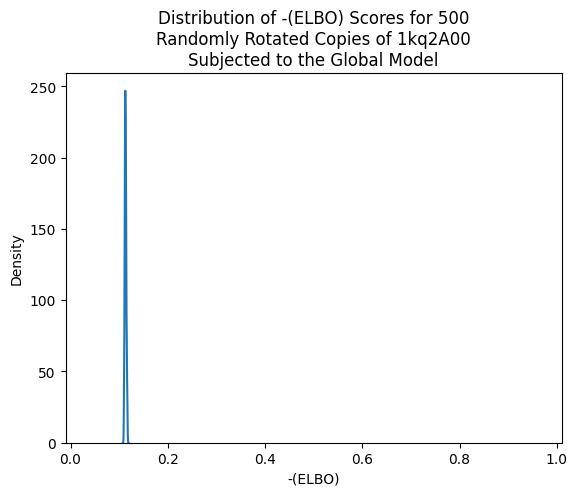

In [7]:
sns.kdeplot(elbo)
plt.xlim(-0.01,1.01)
plt.xlabel("-(ELBO)")
plt.title("Distribution of -(ELBO) Scores for 500\nRandomly Rotated Copies of 1kq2A00\nSubjected to the Global Model")
plt.savefig("random_rotation_1kq2A00_elbo_combined_model.png", dpi=600, bbox_inches="tight")
plt.savefig("random_rotation_1kq2A00_elbo_combined_model.pdf", dpi=600, bbox_inches="tight")

In [8]:
len(latent)

500

In [9]:
distance_raw = pairwise_distances(latent, metric="cosine")

In [10]:
distance_raw

array([[5.9604645e-08, 1.8434882e-02, 2.0506203e-02, ..., 9.1115236e-03,
        1.0583878e-02, 1.9754529e-02],
       [1.8434882e-02, 0.0000000e+00, 1.8988073e-02, ..., 1.7972827e-02,
        1.2954235e-02, 1.7118216e-02],
       [2.0506203e-02, 1.8988073e-02, 0.0000000e+00, ..., 2.5511384e-02,
        1.6257524e-02, 1.9243836e-02],
       ...,
       [9.1115236e-03, 1.7972827e-02, 2.5511384e-02, ..., 0.0000000e+00,
        1.0616064e-02, 1.8929958e-02],
       [1.0583878e-02, 1.2954235e-02, 1.6257524e-02, ..., 1.0616064e-02,
        0.0000000e+00, 1.4669001e-02],
       [1.9754529e-02, 1.7118216e-02, 1.9243836e-02, ..., 1.8929958e-02,
        1.4669001e-02, 0.0000000e+00]], dtype=float32)

In [11]:
distance_raw = distance_raw[np.triu_indices(distance_raw.shape[0], 1)]

In [12]:
distance_raw

array([0.01843488, 0.0205062 , 0.01036572, ..., 0.01061606, 0.01892996,
       0.014669  ], dtype=float32)

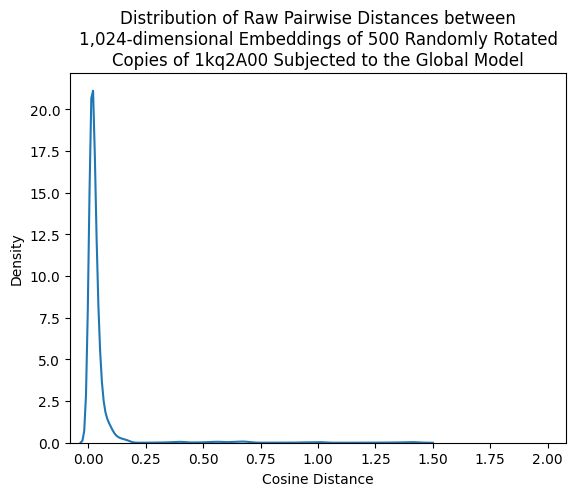

In [13]:
sns.kdeplot(distance_raw.flatten())
plt.xlim(-0.08,2.08)
plt.xlabel("Cosine Distance")
#plt.title("Distribution of Raw 1024-Embedding Distances for\n500 Randomly Rotated Copies of 1kq2A00\nSubjected to the Global Model")
plt.title("Distribution of Raw Pairwise Distances between\n1,024-dimensional Embeddings of 500 Randomly Rotated\nCopies of 1kq2A00 Subjected to the Global Model")
plt.savefig("random_rotation_distanes_1kq2A00_raw_combined_model_v2.png", bbox_inches="tight", dpi=600)
plt.savefig("random_rotation_distanes_1kq2A00_raw_combined_model_v2.pdf", bbox_inches="tight", dpi=600)

In [14]:
import pickle
with open("../../all_combined/1_27_24/results/COSINESIM-cosine-umap-reducer-model.pickle", "rb") as f:
    reducer = pickle.load(f)

In [15]:
umap_embeddings = reducer.transform(latent)

In [16]:
umap_embeddings

array([[  7.5160794,   3.231765 ],
       [  6.7651   ,   2.90369  ],
       [  6.584047 ,   2.9872434],
       [  7.3078284,   3.0700662],
       [  7.337382 ,   3.1510377],
       [  7.367727 ,   3.1759531],
       [  6.984653 ,   3.0413003],
       [  7.372946 ,   2.9930544],
       [  7.36672  ,   3.1081676],
       [  5.925381 ,   3.1870668],
       [  7.3641725,   3.0788226],
       [  6.1783943,   3.4091954],
       [  7.106586 ,   3.2476807],
       [  6.8307652,   3.0725992],
       [  6.453837 ,   3.0139396],
       [  7.1287   ,   3.1276958],
       [  6.2748117,   3.12234  ],
       [  6.2357736,   3.059253 ],
       [  6.031842 ,   3.1687822],
       [  6.86375  ,   2.9559565],
       [  6.9358506,   3.1124365],
       [  7.454718 ,   3.051177 ],
       [  7.875891 ,   3.5049465],
       [  5.8286667,   2.9887056],
       [  7.3267326,   3.3178422],
       [  6.9053206,   3.2572834],
       [  7.0390906,   3.161297 ],
       [  6.779237 ,   3.0033808],
       [  7.3416123,

In [17]:
distance_umap = pairwise_distances(umap_embeddings, metric="cosine")

In [18]:
distance_umap2 = distance_umap[np.triu_indices(distance_umap.shape[0], 1)]

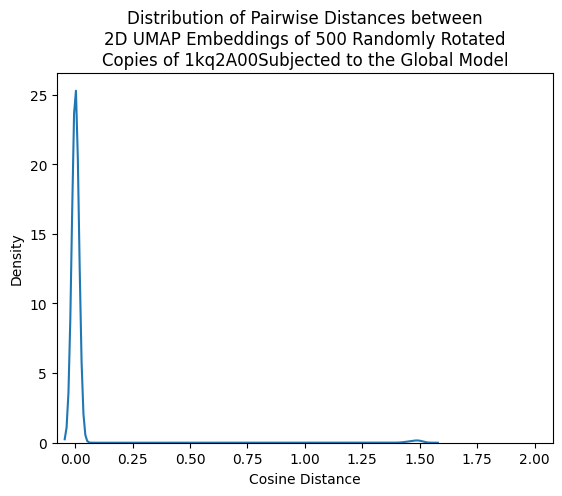

In [19]:
import matplotlib.pyplot as plt
sns.kdeplot(distance_umap2.flatten())
plt.xlim(-0.08,2.08)
plt.xlabel("Cosine Distance")
#plt.title("Distribution of UMAP 2D Embedding Distances for\n500 Randomly Rotated Copies of 1kq2A00\nSubjected to the Global Model")
plt.title("Distribution of Pairwise Distances between\n2D UMAP Embeddings of 500 Randomly Rotated\nCopies of 1kq2A00Subjected to the Global Model")
plt.savefig("random_rotation_distanes_1kq2A00_umap_combined_model_v2.png", dpi=600, bbox_inches="tight")
plt.savefig("random_rotation_distanes_1kq2A00_umap_combined_model_v2.pdf", dpi=600, bbox_inches="tight")

In [20]:
(distance_umap==0).astype(int).sum()

1704

In [21]:
distance_umap

array([[0.0000000e+00, 3.5762787e-07, 1.9717216e-04, ..., 4.1723251e-07,
        3.1173229e-05, 3.2001734e-04],
       [3.5762787e-07, 0.0000000e+00, 2.1010637e-04, ..., 1.1920929e-07,
        3.6418438e-05, 3.3646822e-04],
       [1.9717216e-04, 2.1010637e-04, 0.0000000e+00, ..., 2.1135807e-04,
        7.1465969e-05, 1.4781952e-05],
       ...,
       [4.1723251e-07, 1.1920929e-07, 2.1135807e-04, ..., 0.0000000e+00,
        3.6954880e-05, 3.3807755e-04],
       [3.1173229e-05, 3.6418438e-05, 7.1465969e-05, ..., 3.6954880e-05,
        0.0000000e+00, 1.5145540e-04],
       [3.2001734e-04, 3.3646822e-04, 1.4781952e-05, ..., 3.3807755e-04,
        1.5145540e-04, 0.0000000e+00]], dtype=float32)

In [22]:
(distance_umap2==0).astype(int).sum()

602

In [23]:
distance_umap2

array([3.5762787e-07, 1.9717216e-04, 3.5047531e-05, ..., 3.6954880e-05,
       3.3807755e-04, 1.5145540e-04], dtype=float32)